In [1]:
from google.colab import files
uploaded = files.upload()

Saving diet_data.csv to diet_data.csv


In [2]:
import pandas as pd

# Load the uploaded file
df = pd.read_csv("diet_data.csv")

# Show the first 5 rows to confirm it's loaded correctly
df.head()

,mc_run_id,grouping,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_ghgs_ch4,mean_ghgs_n2o,mean_bio,mean_watuse,...,sd_eut,sd_ghgs_ch4,sd_ghgs_n2o,sd_bio,sd_watuse,sd_acid,n_participants,sex,diet_group,age_group
0,1,fish_female_20-29,5.377071,8.589807,14012.27478,23.553012,1.165277,0.344528,478.802638,669.154382,...,13.788241,0.913103,0.238819,400.289973,402.372408,13.774998,1329,female,fish,20-29
1,1,fish_female_30-39,5.376457,8.620238,15030.26610,23.831419,1.152422,0.326276,469.573862,697.161548,...,13.466037,0.845564,0.210539,375.301226,420.147350,13.077207,2024,female,fish,30-39
2,1,fish_female_40-49,5.169838,8.304831,15441.25934,23.419815,1.095640,0.305898,435.534050,687.733569,...,12.692978,0.773937,0.190561,333.613445,404.151916,12.959012,1689,female,fish,40-49
3,1,fish_female_50-59,4.933744,7.880759,16244.68021,23.459450,0.995247,0.285800,382.097727,686.763592,...,13.825273,0.669932,0.166206,271.061989,429.965087,13.155250,946,female,fish,50-59
4,1,fish_female_60-69,5.428442,8.701867,18364.95302,25.469176,1.127873,0.315651,435.578230,751.050809,...,14.538055,0.907853,0.196968,396.811097,471.376883,14.177048,492,female,fish,60-69


In [3]:
['diet_group', 'mean_ghgs', 'mean_land', 'mean_watscar',
 'mean_eut', 'mean_bio', 'mean_watuse', 'mean_acid']

['diet_group',
 'mean_ghgs',
 'mean_land',
 'mean_watscar',
 'mean_eut',
 'mean_bio',
 'mean_watuse',
 'mean_acid']

In [4]:
# Step 2: Select only the relevant columns for our visualization
selected_columns = [
    'diet_group',        # Type of diet
    'mean_ghgs',         # Greenhouse gas emissions
    'mean_land',         # Land use
    'mean_watscar',      # Water scarcity
    'mean_eut',          # Eutrophication
    'mean_bio',          # Biodiversity loss
    'mean_watuse',       # Water use
    'mean_acid'          # Acidification
]

# Create a new DataFrame with only these columns
df_selected = df[selected_columns]

# Check for missing values
df_selected.isnull().sum()

,0
diet_group,0
mean_ghgs,0
mean_land,0
mean_watscar,0
mean_eut,0
mean_bio,0
mean_watuse,0
mean_acid,0


In [5]:
# Step 3: Group by diet group and calculate mean of all metrics
grouped_data = df_selected.groupby("diet_group").mean().reset_index()

# Show the result to check the structure
grouped_data

,diet_group,mean_ghgs,mean_land,mean_watscar,mean_eut,mean_bio,mean_watuse,mean_acid
0,fish,5.452489,7.319218,19709.243846,23.065932,274.857505,845.594953,25.515540
1,meat,7.937179,13.692233,20485.836984,31.951860,339.617912,914.769192,35.725884
2,meat100,13.624876,28.558030,27061.571592,50.675963,507.346225,1172.172206,55.798517
3,meat50,5.766550,8.607969,17878.297107,23.974645,274.592299,782.329001,27.016860
4,vegan,2.551045,4.433825,15083.835327,11.202768,122.011847,443.401156,11.281311
5,veggie,4.758030,6.921814,17347.139031,18.821007,267.572713,600.437776,22.770609


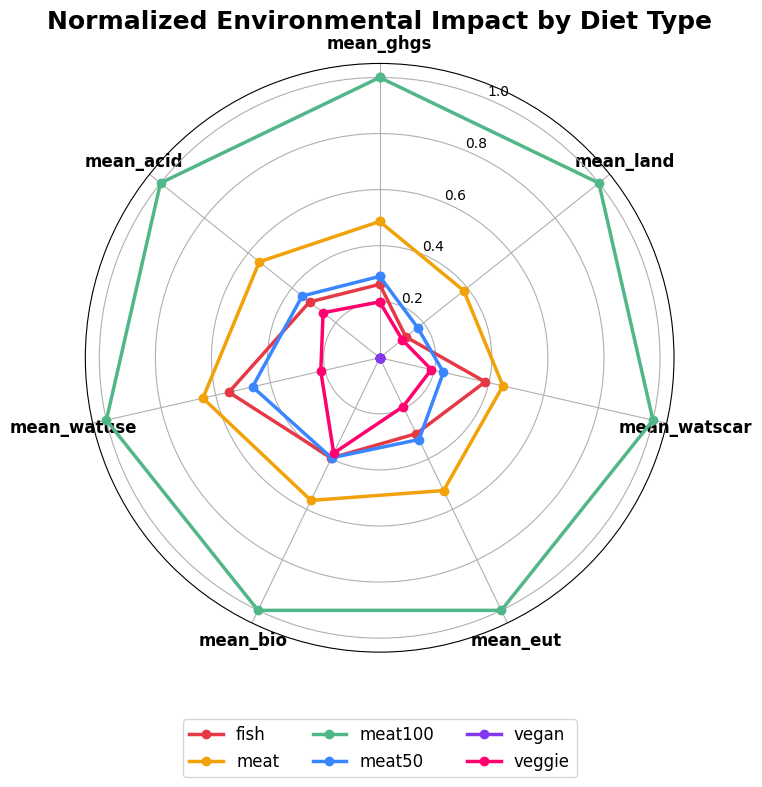

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load your CSV file (make sure it's uploaded to Colab)
df = pd.read_csv("diet_data.csv")

# Step 2: Select relevant columns
selected_columns = [
    'diet_group', 'mean_ghgs', 'mean_land', 'mean_watscar',
    'mean_eut', 'mean_bio', 'mean_watuse', 'mean_acid'
]
df_selected = df[selected_columns]

# Step 3: Group and normalize data
grouped_data = df_selected.groupby("diet_group").mean().reset_index()
scaler = MinMaxScaler()
scaled_data = grouped_data.copy()
scaled_data[selected_columns[1:]] = scaler.fit_transform(grouped_data[selected_columns[1:]])

# Step 4: Define color mapping
color_map = {
    'fish': '#E63946',     # red
    'meat': '#F1A208',     # orange
    'meat100': '#52B788',  # green
    'meat50': '#3A86FF',   # blue
    'vegan': '#8338EC',    # purple
    'veggie': '#FF006E'    # pink
}

# Step 5: Setup radar chart layout
labels = selected_columns[1:]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Step 6: Draw lines with markers
for i, row in scaled_data.iterrows():
    values = row[labels].tolist() + row[labels].tolist()[:1]
    diet = row['diet_group']
    ax.plot(
        angles, values,
        label=diet,
        color=color_map[diet],
        linewidth=2.5,
        marker='o'  # this shows a circle on each point
    )

# Step 7: Style the chart
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=12, fontweight='bold')
ax.set_title("Normalized Environmental Impact by Diet Type", fontsize=18, pad=25, weight='bold')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=12)
plt.tight_layout()

# Step 8: Save and show the plot
plt.savefig("radar_chart_fixed.png", dpi=300, bbox_inches='tight')
plt.show()

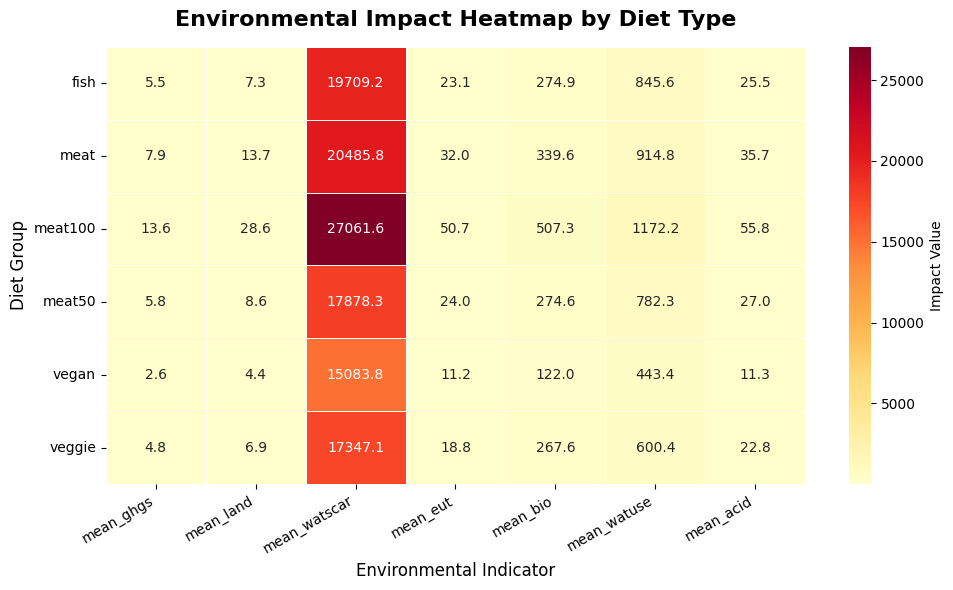

In [9]:
# Step 1: Reload data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diet_data.csv")

# Step 2: Select and prepare data
selected_columns = [
    'diet_group', 'mean_ghgs', 'mean_land', 'mean_watscar',
    'mean_eut', 'mean_bio', 'mean_watuse', 'mean_acid'
]
df_selected = df[selected_columns]
grouped_data = df_selected.groupby("diet_group").mean().reset_index()

# Step 3: Draw heatmap
heatmap_data = grouped_data.set_index("diet_group")[
    ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut',
     'mean_bio', 'mean_watuse', 'mean_acid']
]

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=0.5, cbar_kws={"label": "Impact Value"})

plt.title("Environmental Impact Heatmap by Diet Type", fontsize=16, weight='bold', pad=15)
plt.ylabel("Diet Group", fontsize=12)
plt.xlabel("Environmental Indicator", fontsize=12)
plt.xticks(rotation=30, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("heatmap_chart.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
from google.colab import files
files.download("radar_chart_fixed.png")
files.download("heatmap_chart.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>